<a href="https://colab.research.google.com/github/myller-silva/SO-trabalho-03-paginacao/blob/main/evaluate_aging_algorithm_with_varying_bits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [53]:
from collections import deque
import random
import math
import matplotlib.pyplot as plt

# Algoritmos

In [54]:
def fifo(referencias_as_paginas, qtd_molduras):
  molduras = []
  faltas_de_pagina = 0

  for pagina in referencias_as_paginas:
    if pagina not in molduras:
      faltas_de_pagina += 1
      if len(molduras) == qtd_molduras:
        molduras.pop(0)
      molduras.append(pagina)

  return faltas_de_pagina


def aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits=None):
    if qtd_bits is None:
      qtd_bits = qtd_molduras
    molduras = []
    idade_paginas = []
    faltas_de_pagina = 0

    for pagina in referencias_as_paginas:
        if pagina in molduras:
            indice_pagina = molduras.index(pagina)
            idade_paginas[indice_pagina] >>= 1
            idade_paginas[indice_pagina] |= 1 << (qtd_bits - 1)
        else:
            faltas_de_pagina += 1
            idade_paginas = [idade >> 1 for idade in idade_paginas]
            if len(molduras) == qtd_molduras:
                indice_pagina_a_remover = idade_paginas.index(min(idade_paginas))
                molduras[indice_pagina_a_remover] = pagina
                idade_paginas[indice_pagina_a_remover] = 1 << (qtd_bits - 1)
            else:
                molduras.append(pagina)
                idade_paginas.append(1 << (qtd_bits - 1))
    return faltas_de_pagina


In [55]:
def experimento_fifo_vs_aging(qtd_referencias, qtd_paginas, max_molduras = 64):
    paginas  = [i for i in range(qtd_paginas)]
    referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # tamanho_molduras = [2**i for i in range( int(math.log2(max_molduras)) + 1) ] # se max_molduras == 16, entao [2^0, 2^1 , 2^2, 2^3]
    tamanho_molduras = [i for i in range(1, max_molduras+1)]
    fifo_acumulate = []
    aging_acumulate = []
    # print('molduras: ', tamanho_molduras)

    for tamanho_moldura in tamanho_molduras:
        fifo_acumulate.append(fifo(referencias_as_paginas, tamanho_moldura))
        aging_acumulate.append(aging_bits(referencias_as_paginas, tamanho_moldura))

    return fifo_acumulate, aging_acumulate, tamanho_molduras


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[988, 969, 955, 939, 923, 916, 900, 889, 873, 855, 839, 823, 806, 789, 773, 758, 739, 730, 727, 711, 696, 683, 659, 644, 627, 609, 587, 567, 557, 548, 534, 518]
[988, 969, 955, 941, 924, 911, 896, 884, 866, 851, 837, 815, 801, 787, 774, 756, 741, 731, 714, 703, 691, 672, 659, 647, 631, 614, 594, 584, 574, 552, 538, 519]


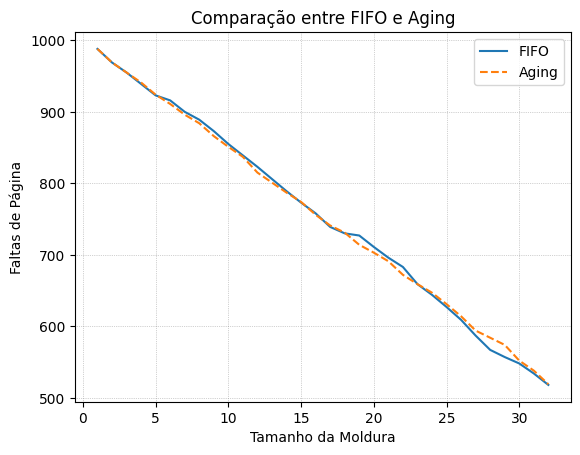

In [56]:
fifo_array, aging_array, tamanho_molduras = experimento_fifo_vs_aging(qtd_referencias = 1000, qtd_paginas = 64, max_molduras=32)
print(tamanho_molduras)
print(fifo_array)
print(aging_array)

# plotagem
plt.plot(tamanho_molduras, fifo_array, label='FIFO')
plt.plot(tamanho_molduras, aging_array, label='Aging', linestyle='--')
plt.grid(True, linestyle=':', color='gray', alpha=0.7, linewidth=0.5)
plt.xlabel('Tamanho da Moldura')
# plt.xticks(tamanho_molduras)
plt.ylabel('Faltas de Página')
plt.title('Comparação entre FIFO e Aging')
plt.legend()
plt.show()


# Aging com tamanho de contadores com bits diferents para as mesmas referências

In [57]:
def evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range, ):
    resultados = []
    for qtd_bits in bits_range:
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_bits)
        resultados.append(faltas)
    return resultados


In [58]:
qtd_referencias = 1000
qtd_paginas = 64
qtd_molduras = 32

bits_range = [i for i in range(1, 64)]

paginas = [i for i in range(qtd_paginas)]
referencias_as_paginas = random.choices(paginas, k=qtd_referencias)

resultados = evaluate_aging_algorithm_with_varying_bits(referencias_as_paginas, qtd_molduras, bits_range)
print(bits_range)
print(resultados)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]
[515, 509, 491, 494, 490, 491, 495, 502, 505, 504, 498, 502, 502, 518, 519, 526, 525, 524, 510, 522, 527, 519, 521, 515, 519, 520, 520, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 519, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518, 518]


# Variância


In [61]:
qtd_referencias = 1000
qtd_molduras = 32
qtd_paginas = 64

paginas = [i for i in range(qtd_paginas)]

num_experiements = 100

m_r = []

for i in range(num_experiements):
    r = []
    for i in range(1, qtd_molduras+1):
        qtd_referencias = i * 100
        referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
    # referencias_as_paginas = random.choices(paginas, k=qtd_referencias)
        faltas = aging_bits(referencias_as_paginas, qtd_molduras, qtd_molduras)
        r.append(faltas)
    m_r.append(r)
for r in m_r:
    print(r)



[53, 100, 158, 214, 271, 301, 357, 419, 473, 517, 555, 615, 640, 696, 798, 820, 869, 903, 969, 969, 1046, 1108, 1199, 1203, 1265, 1303, 1359, 1380, 1505, 1537, 1533, 1691]
[62, 117, 163, 198, 247, 313, 356, 414, 474, 514, 583, 635, 634, 677, 774, 815, 873, 888, 959, 978, 1057, 1104, 1116, 1213, 1231, 1321, 1351, 1423, 1480, 1535, 1517, 1609]
[60, 110, 168, 206, 266, 313, 366, 390, 474, 478, 568, 631, 635, 721, 750, 808, 847, 926, 927, 971, 1108, 1129, 1189, 1188, 1243, 1317, 1395, 1350, 1448, 1486, 1584, 1558]
[56, 112, 166, 222, 270, 325, 381, 420, 479, 513, 542, 609, 671, 681, 777, 801, 855, 919, 901, 1004, 1065, 1107, 1129, 1230, 1270, 1315, 1314, 1330, 1447, 1519, 1587, 1625]
[65, 110, 158, 212, 275, 328, 364, 427, 438, 500, 569, 599, 678, 707, 771, 810, 888, 924, 946, 1018, 1059, 1106, 1154, 1205, 1198, 1328, 1341, 1386, 1492, 1545, 1598, 1582]
[60, 102, 169, 234, 256, 304, 380, 414, 434, 522, 574, 604, 670, 706, 755, 794, 864, 909, 972, 1018, 1015, 1105, 1180, 1216, 1253, 1304, 1

In [63]:
import statistics
statistics.mean(r)

835.84375

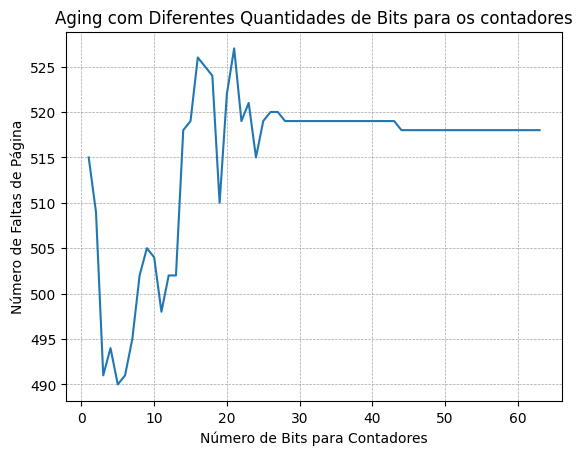

In [60]:
plt.plot(
    bits_range,
    resultados,
    # marker='o'
    )

# plotar valores dos y
# for x, y in zip(bits_range, resultados):
#     plt.text(x, y, f'{y} ', ha='right', va='baseline')

plt.xlabel('Número de Bits para Contadores')
plt.ylabel('Número de Faltas de Página')
plt.title('Aging com Diferentes Quantidades de Bits para os contadores')
plt.grid(True, linestyle='--', color='gray', alpha=0.7, linewidth=0.5)
plt.show()